In [1]:
%cd ..

import os
from src.model.base import MonoTimeStepModel
from src.dataset import Dataset
import torch
from torchviz import make_dot

/media/manu/Data/PycharmProjects/thesis
  DEBUG - deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet'])
  DEBUG - deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet'])
  DEBUG - deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
  DEBUG - deprecate positional args: graphviz.backend.viewing.view(['quiet'])
  DEBUG - deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'endswith_odd_number_of_backslashes', 'escape_unescaped_quotes'])
  DEBUG - deprecate positional args: graphviz.quoting.a_list(['kwargs', 'attributes'])
  DEBUG - deprecate positional args: graphviz.quoting.attr_list(['kwargs', 'attributes'])
  DEBUG - deprecate positional args: graphviz.dot.Dot.clear(['keep_attrs'])
  DEBUG - deprecate positional args: graphviz.dot.Dot.__iter__(['subgraph'])
  DEBUG - deprec

In [3]:
dataset = Dataset(
    sequence_size=48 * 4,
    melody_encoding_type='timestep',
    polyphonic=False,
    chord_encoding_type='extended',
    chord_extension_count=7,
    transpose_mode='none'
)
dataset.load()

In [4]:
model = MonoTimeStepModel(
    dataset=dataset
)

   INFO - --- Init Model ---
  DEBUG - Model past LSTM input size: 2562
  DEBUG - Model present LSTM input size: 2305
  DEBUG - Model future LSTM input size: 2305


In [14]:
dot = make_dot(model(
    torch.zeros((2, 5, 12)).long().cuda(),
    torch.zeros((2, 1, 10)).long().cuda(),
    torch.zeros((2, 5, 10)).long().cuda()
), params=dict(model.named_parameters()), show_attrs=False, show_saved=False)

dot.render("./attached", format="png")

  DEBUG - os.makedirs('.')
  DEBUG - write lines to './attached'
  DEBUG - run [PosixPath('dot'), '-Kdot', '-Tpng', '-O', 'attached']


'attached.png'

In [14]:
%grep "End of epoch" "22_04_21_183608_sequence_96_transpose_none_chord_extended_7_batchsize_64_seed_1234567890.log"

UsageError: Line magic function `%grep` not found.


In [18]:
import os
import subprocess

subprocess.call(['grep', 'Train loss', 'results/training_results/22_04_21_183608_sequence_96_transpose_none_chord_extended_7_batchsize_64_seed_1234567890.log'])

   INFO - | Train loss  0.62 | Train ppl     1.85 | valid_pitch_loss: 0.9800230345601043 | valid_attack_loss: 0.25246881824307127 | valid_pitch_top1: 76.21237714987716 | valid_pitch_top3: 87.87264537264537 | valid_pitch_top5: 91.22133497133497 | valid_attack_top1: 88.6558149058149
   INFO - | Train loss  0.50 | Train ppl     1.66 | valid_pitch_loss: 0.7906951590506002 | valid_attack_loss: 0.21828013299968183 | valid_pitch_top1: 79.54571048321048 | valid_pitch_top3: 90.93570843570843 | valid_pitch_top5: 93.81961506961507 | valid_attack_top1: 88.6558149058149
   INFO - | Train loss  0.49 | Train ppl     1.62 | valid_pitch_loss: 0.7659883528850198 | valid_attack_loss: 0.2049776530742987 | valid_pitch_top1: 79.78450040950041 | valid_pitch_top3: 91.16707616707616 | valid_pitch_top5: 93.91891891891892 | valid_attack_top1: 88.65658271908272
   INFO - | Train loss  0.47 | Train ppl     1.61 | valid_pitch_loss: 0.7492159724748105 | valid_attack_loss: 0.1975954416452813 | valid_pitch_top1: 79.91

0

093366093367 | valid_pitch_top3: 91.33138820638821 | valid_pitch_top5: 94.09551597051598 | valid_attack_top1: 88.65607084357084
   INFO - | Train loss  0.47 | Train ppl     1.59 | valid_pitch_loss: 0.7397315314614704 | valid_attack_loss: 0.19294170022413537 | valid_pitch_top1: 80.01407657657657 | valid_pitch_top3: 91.48827805077805 | valid_pitch_top5: 94.21708640458641 | valid_attack_top1: 88.65607084357084
   INFO - | Train loss  0.46 | Train ppl     1.58 | valid_pitch_loss: 0.7302747356095927 | valid_attack_loss: 0.18871823290269898 | valid_pitch_top1: 80.08855446355446 | valid_pitch_top3: 91.57069000819001 | valid_pitch_top5: 94.28926085176086 | valid_attack_top1: 88.65607084357084
   INFO - | Train loss  0.45 | Train ppl     1.58 | valid_pitch_loss: 0.7233632385462254 | valid_attack_loss: 0.18601873072625474 | valid_pitch_top1: 80.21677927927928 | valid_pitch_top3: 91.628276003276 | valid_pitch_top5: 94.3696253071253 | valid_attack_top1: 88.6558149058149
   INFO - | Train loss  0.4

In [9]:
%ls

attached*      data/            package.json*       __pycache__/  src/
attached.png*  other_projects/  package-lock.json*  results/      venv/


In [12]:
import matplotlib.pyplot as plt

In [19]:
# train
tp = [
    0.9800230345601043,
    0.7906951590506002,
    0.7659883528850198,
    0.7492159724748105,
    0.7397315314614704,
    0.7302747356095927,
    0.7233632385462254,
    0.7145247600319735,
    0.7082253851039209,
    0.7019460012271305
]
ta = [
    0.25246881824307127, 0.21828013299968183, 0.2049776530742987, 0.1975954416452813, 0.19294170022413537,
    0.18871823290269898, 0.18601873072625474, 0.1825241113116661, 0.18011568840425293, 0.17709782843849486
]

In [20]:
vp = [
    0.7879048815117942, 0.7798066658291466, 0.7360646835672262, 0.7746496278926369, 0.7408183774023315, 
    0.7318245163577255, 0.7358112028356312, 0.7432805596001795, 0.7403248423370605, 0.7492553255000347
]
va = [
    0.21083007296328002, 0.1918898348187547, 0.17859268592279795, 0.1793031582533901, 0.1818548444018264, 
    0.18134613346060216, 0.17443860236105588, 0.17748128445247205, 0.18172000420735354, 0.1783554362761581
]

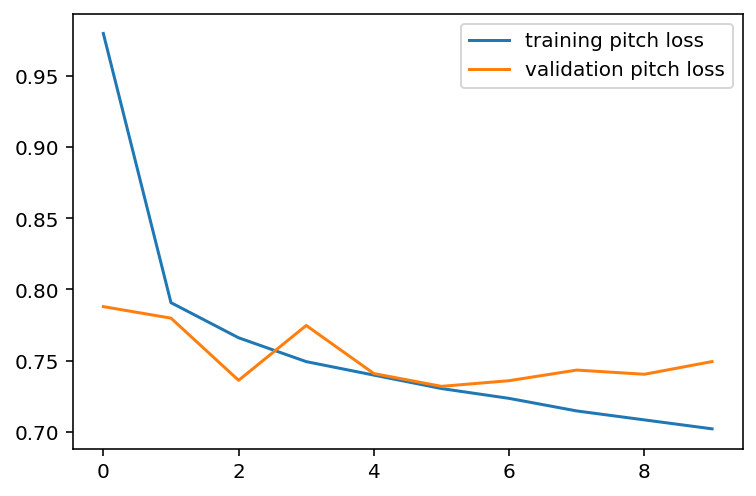

In [28]:
plt.plot(tp, label='training pitch loss')
plt.plot(vp, label='validation pitch loss')
plt.legend(loc="upper right")
plt.show()

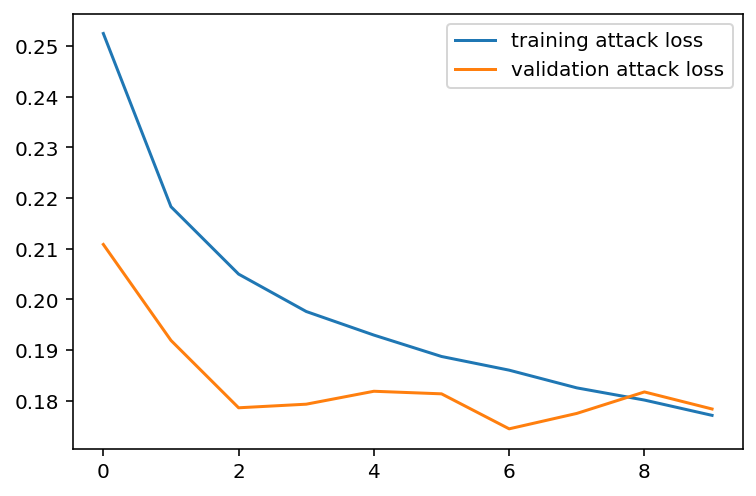

In [29]:
plt.plot(ta, label='training attack loss')
plt.plot(va, label='validation attack loss')
plt.legend(loc="upper right")
plt.show()

In [30]:
# train
tp = [
    0.9722306117037102,
    0.7862609249782991,
    0.762208624146299,
    0.747729421237958,
    0.736345718841295,
    0.7278001798653974,
    0.7200711767684232,
    0.7128868606566993,
    0.7067652663522622,
    0.7007643980803204
]
ta = [
    0.2494458269538399, 
    0.21726882575746445, 
    0.20669889419868187, 
    0.19910335381325397, 
    0.19348478032173824,
    0.18986280190039131, 
    0.1861999729103626, 
    0.18354414856331355,
    0.18150125568020206, 
    0.17833686567611085
]

In [31]:
vp = [
    0.8462988458359363, 0.7405233997211704, 0.760589793365978, 
    0.7379515407919994, 0.7446426943207407, 
    0.7499534841090745, 0.7347724956002851, 0.7282642524831253, 
    0.7461039127302922, 0.7049871216300692
]
va = [
    0.2221055316878007, 0.2078930431684633, 0.20014317436083223, 
    0.1955253163987326, 0.19561026982803972, 
    0.18783239760507892, 0.1894440636412347, 0.18775241849675928, 
    0.18545119218120115, 0.18565832096443424
]

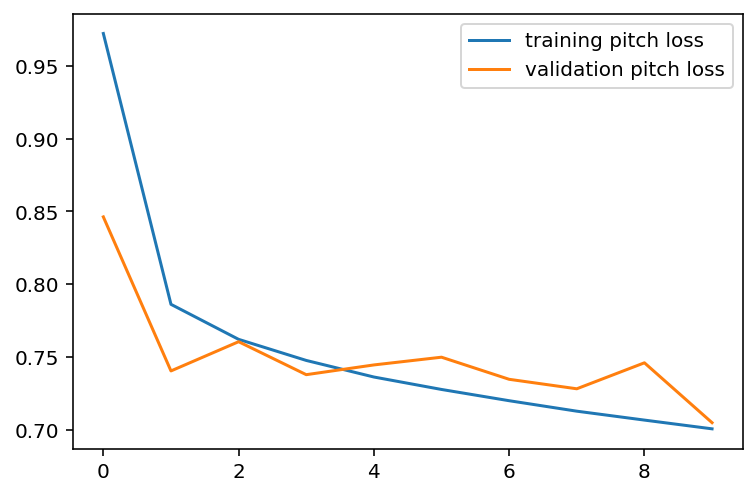

In [32]:
plt.plot(tp, label='training pitch loss')
plt.plot(vp, label='validation pitch loss')
plt.legend(loc="upper right")
plt.show()

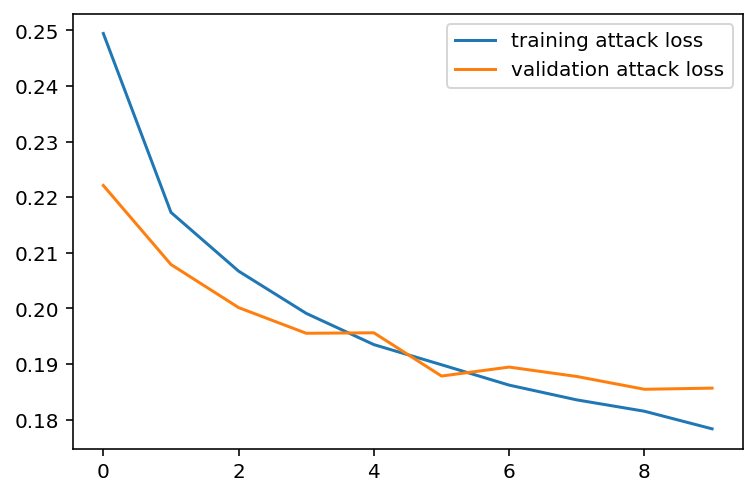

In [33]:
plt.plot(ta, label='training attack loss')
plt.plot(va, label='validation attack loss')
plt.legend(loc="upper right")
plt.show()